### Import Required Libraries

In [2]:
import gdal
import scipy
import scipy.signal
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import stats
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model

%matplotlib inline
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['figure.figsize'] = 18, 8

### Open the stacked Image [this stack consist of 74 monthly images of UP] 

In [3]:
img1 = gdal.Open(r'F:\Uttar_Pradesh\UP_stacked2013\UP_stacked.tif')

In [4]:
stack = img1.ReadAsArray()

In [5]:
img2 = gdal.Open(r'F:\Uttar_Pradesh\UP_mask\final_mask.tif')

In [6]:
mask = img2.ReadAsArray()

### Import Mask of Uttar Pradesh

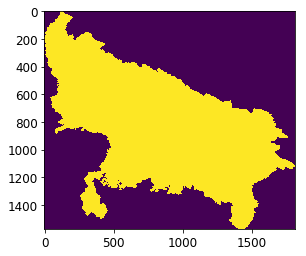

In [7]:
plt.imshow(mask)

In [8]:
shape = mask.shape

In [9]:
stack.shape

(74, 1573, 1815)

In [10]:
output = np.full((1573,1815),np.NaN)

In [11]:
output1 = np.full((1573,1815),np.NaN)

In [12]:
for i in range(1573):
    for j in range(1815): 
        c = stack[:,i,j]
        if mask[i,j] ==1:
            gradient = np.gradient(c)
            inflections = np.argmin(gradient)
            output[i,j] = inflections

### FINAL OUTPUT

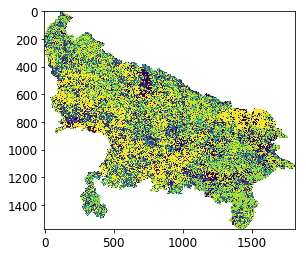

In [13]:
plt.imshow(output)

In [14]:
geo = img1.GetGeoTransform()
proj = img1.GetProjection()

In [16]:
driver = gdal.GetDriverByName("GTiff")
dst_ds = driver.Create( "gradient.tif", shape[1], shape[0], 1, gdal.GDT_Float32)
dst_ds.SetGeoTransform( geo )
dst_ds.SetProjection( proj )
dst_ds.GetRasterBand(1).WriteArray(output)

0